In [56]:
from loader import *
from datasets import *
from vis_utils import *
from utils import *
from stats import *
from model_utils import *
from plt_utils import *
from logs import logger
import logs, datasets, vis_utils, loader

logger.setLevel(logs.WARN)
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
matplotlib.style.use('ggplot')
%matplotlib inline

utils.init_dev(utils.get_dev( ))
utils.allow_growth()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Auto select gpu
 ID  GPU  MEM
--------------
  0   0%   2%
  1   0%   1%
  2   0%  70%
  3   0%   0%
  4 100%  22%
  5   0%   5%
  6   0%   5%
  7   0%   5%


# What is Sparsity
After we see the result below, we may rethink waht is sparsity?



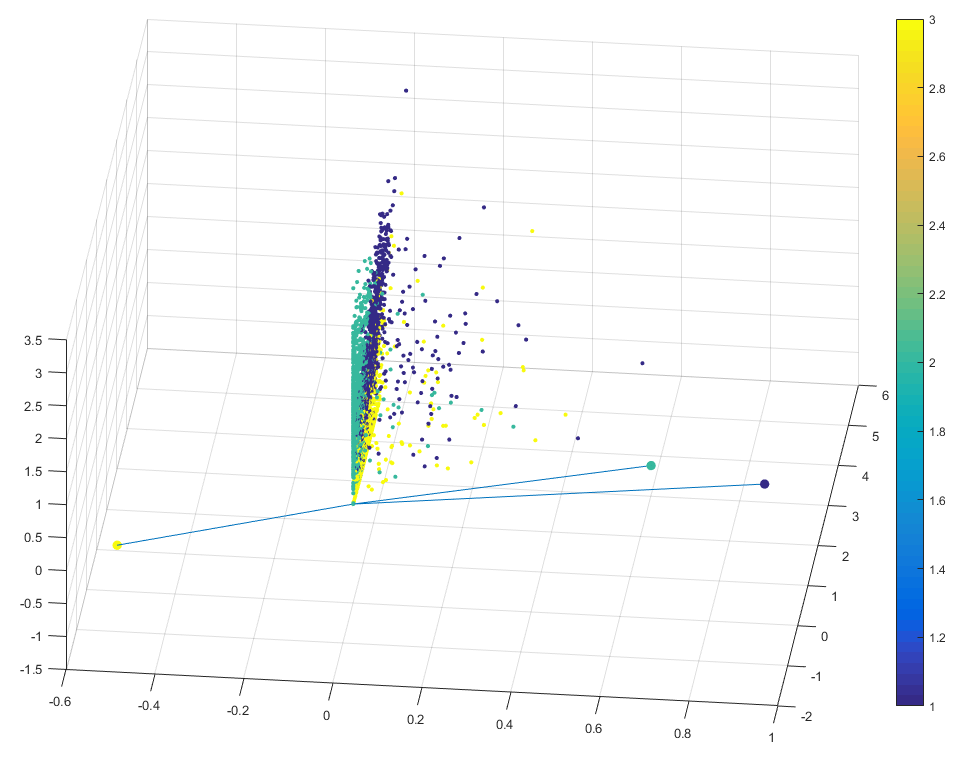

In [57]:
show_img('demo.png')

- Sparsity do not neccessiarily means near to zero, it means data gather in sub-dimension! 
- Above figure is generated by an undercomplete model whose nunber of hidden units for feature is 512-dim, but only need to classify data into three classes, with performance of 72%, so that we do not need to reduce dimension for visulize. 
- Let us use our another best model(512 hidden dims + 10 classes) to check this conclusion.

In [58]:
model=keras.models.load_model('../good/vgg10_cifar10_hiddens_512_loss_softmax_classes_10_optimizer__lr_0.01_name_sgd/model.h5')
evaluate(model)

0.81530000000000002

In [59]:
ker=model.layers[-2].get_weights()[0]
ker.shape

(512, 10)

In [60]:
data=Dataset('cifar10')

data.x_test.shape

inp=K.function(inputs=[model.input,K.learning_phase()],outputs=[model.layers[-2].input])([data.x_test,0])[0]
inp.shape

(10000, 512)

(<matplotlib.figure.Figure at 0x7fc7dee21190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc7dee216d0>)

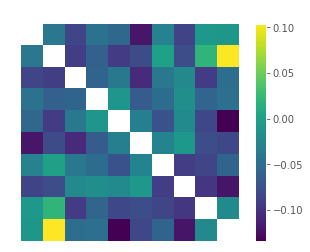

In [61]:
matshow(orthochnl(ker,reduce=False),fill=True)

(<matplotlib.figure.Figure at 0x7fc7a1ee68d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc72f29cbd0>)

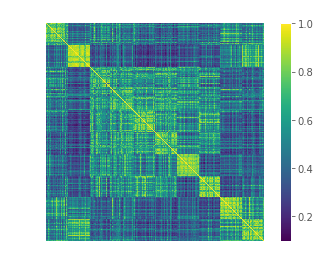

In [ ]:
matshow(orthosmpl(inp,reduce=False))

In [ ]:
U, s, V = np.linalg.svd(inp, full_matrices=True)

## The evidence of rank is not strong, since it is affected by noise.

In [ ]:
print np.linalg.matrix_rank(inp),inp.shape

## The  single values with high energy(Y-axis) is rare. 

In [ ]:
plt.plot(s,marker='.')

## Most single value distributes at 2e-13 to 2e1, close to zero. (Low energy)
Although we know the data of real world are sparse by nature, but it is amazing to see the extracted feature are also sparse! 

I hypothesize modest sparsity is beneficial:
- Too sparse means the input features are difficult to seperate.
- Not sparse may cause overfitting. 

In [ ]:
cnts,bins,_=plt.hist(s,bins=100)
cnts,bins[:3]